<a href="https://colab.research.google.com/github/Nasrin-Akhtar/IITM_MLT-Machine_Learning_Technique/blob/main/Week_1_Programming_MLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-1

**Note to Learners**:

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [71]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

## Problem-1

How many samples does the dataset have?

In [72]:
X.shape
# Enter your solution here

(100, 784)

**Number of sample is 100**

## Problem-2

How many features does the dataset have?

In [73]:
test_image.shape
# Enter your solution here


(784,)

**Total number of features 784**

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library.

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)


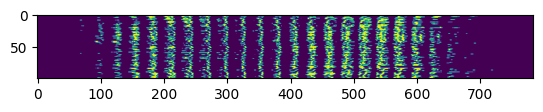

In [74]:
import matplotlib.pyplot as plt
print(repr(X))
implot=plt.imshow(X)
# Enter your solution here

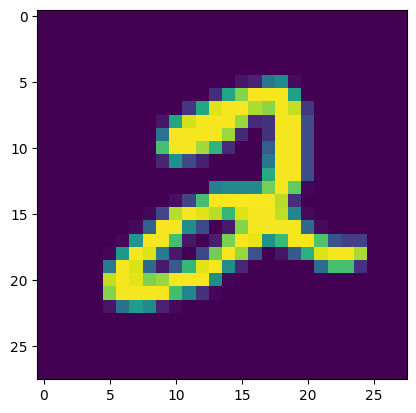

In [75]:
X_new = X_train[y_train == 2][: 100].reshape(-1, 28 * 28).T
plt.imshow(X_new[:,0].reshape(28,28))

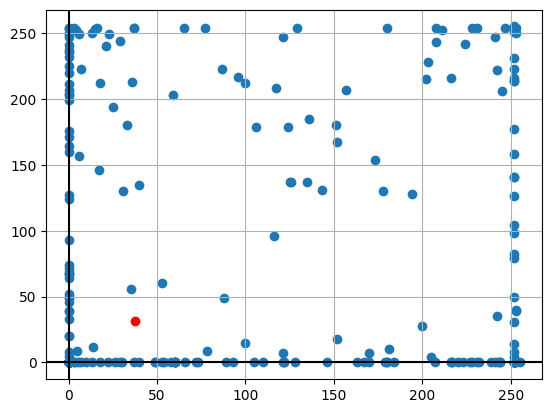

In [76]:
plt.scatter(X[0,:],X[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')
x_mean=X.mean(axis=1)
plt.scatter(x_mean[0],x_mean[1],color='r')
plt.grid()
plt.show()

**Hence, data is not centered**

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [85]:
def center(X):
  return X-X.mean(axis=1).reshape(-1,1)
d,n= X_new.shape
X_centered=  center(X_new)
# Enter your solution here

In [86]:
X_centered

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

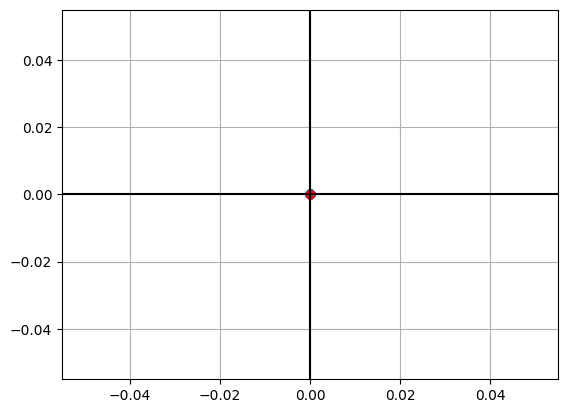

In [87]:
plt.scatter(X_centered[0,:],X_centered[1,:])
plt.axhline(0,color='k')
plt.axvline(0,color='k')
c_mean=X_centered.mean(axis=1)
plt.scatter(c_mean[0],c_mean[1],color='r')
plt.grid()
plt.show()

## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [88]:
def covarience(X_new):
  return X_new @ X_new.T / X_new.shape[1]
C= covarience(X_centered)
d= C.shape[0]
print(C)

# Enter your solution here

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [97]:
 def compute_pc(C):
  d=C.shape[0]
  eigval, eigvec= np.linalg.eigh(C)
  W1,W2 = eigvec[:,-1], eigvec[:,-2]
  return W1, W2
 W1, W2= compute_pc(C)
 W1= W1.reshape(W1.shape[0],1)
 W2= W2.reshape(W2.shape[0],1)
 print(W1)
 print(W2)
 # Enter your solution here

[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.0000000

## Problem-7

Visualize the first principal component as an image.

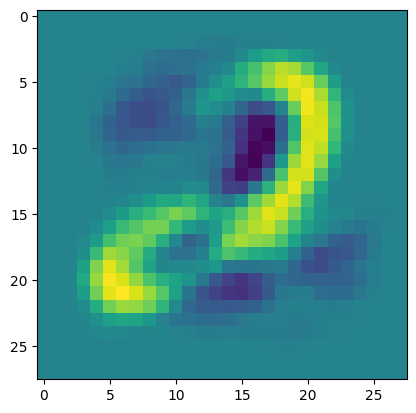

In [90]:

plt.imshow(W1.reshape(28,28))# Enter your solution here

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [91]:
eigen_value, eigen_vector =np.linalg.eigh(C)
eigen_value=eigen_value[::-1]# Enter your solution here

In [92]:
den= sum(eigen_value)
for k in range(1, len(eigen_value)+1):
  num=sum(eigen_value[:k])
  if num/den>=0.95:
    break
print('Smallest value of k is :',k)

Smallest value of k is : 53


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



In [93]:
from numpy.linalg.linalg import eig
def reconstruct(C,test_image, thresh):
  eigval,eigvec= np.linalg.eigh(C)
  eigval= list(reversed(eigval))
  tol=sum(eigval)
  k= len(eigval)
  for i in range(len(eigval)):
    if sum(eigval[:i+1])/tol >=thresh:
      k=i+1
      break
  w= eigvec[:, -k:]
  coeff = test_image @ w
  return w @ coeff

# Enter your solution here

Text(0.5, 1.0, 'variance covered 95%')

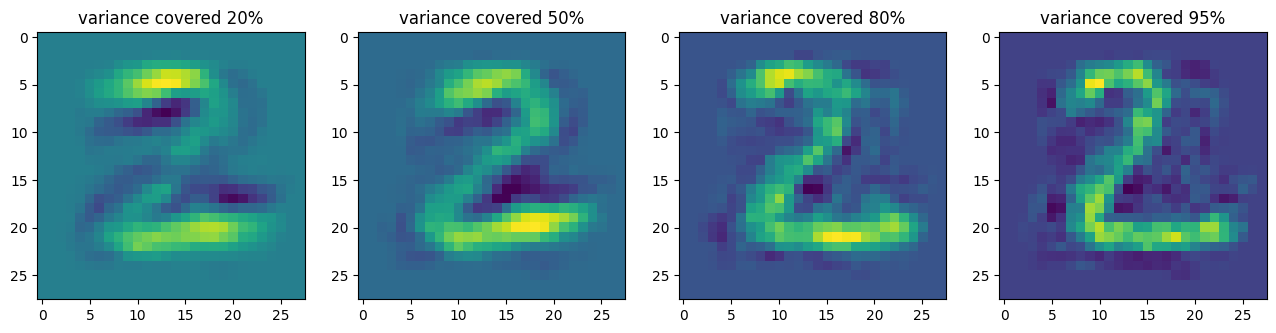

In [96]:
plt.figure(figsize=(20,20))
recon_image = reconstruct(C, test_image, 0.20)
plt.subplot(1,5,1)
plt.imshow(recon_image.reshape(28, 28))
plt.title('variance covered 20%')
recon_image = reconstruct(C, test_image, 0.50)
plt.subplot(1,5,2)
plt.imshow(recon_image.reshape(28, 28))
plt.title('variance covered 50%')
recon_image = reconstruct(C, test_image, 0.80)
plt.subplot(1,5,3)
plt.imshow(recon_image.reshape(28, 28))
plt.title('variance covered 80%')
recon_image = reconstruct(C, test_image, 0.95)
plt.subplot(1,5,4)
plt.imshow(recon_image.reshape(28, 28))
plt.title('variance covered 95%')